In [1]:
!pip install networkx
!pip install -U -q Pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials

#data dependencies
# importando librerias
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import math as mt
import warnings

!pip install pydotplus
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import mutual_info_classif
import pydotplus
from sklearn import preprocessing


# Ploting styles
# styles: 'fivethirtyeight', 'classic', 'ggplot', 'seaborn-notebook'
# styles: 'seaborn-poster', 'bmh', 'grayscale', 'seaborn-whitegrid'
matplotlib.style.use('bmh')
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#print(plt.style.available)
warnings.filterwarnings("ignore")

     |████████████████████████████████| 993kB 2.8MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
#authenticate
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
train_downloaded = drive.CreateFile({'id': '1tXfVZULkqqQrv_jqLCsAZ6qxjkGUyENW'})
train_downloaded.GetContentFile('data_modelo.csv')
df_modelo = pd.read_csv('data_modelo.csv')

In [4]:
df_modelo.head()

,Tipo_Linea,Departamento_Alta,Subsegmento_Valor,CICLO_C05,CICLO_C15,CICLO_C23,MARCA_APPLE,MARCA_HUAWEI,MARCA_LENOVO,MARCA_LG,MARCA_MOTOROLA,MARCA_OTROS,MARCA_SAMSUNG,PLAN_GRUPO_ELIGE,PLAN_GRUPO_OTRO,PLAN_GRUPO_PORTABILIDAD,PLAN_GRUPO_RPM,PLAN_GRUPO_STAFF,PLAN_GRUPO_VUELA,ENTMIN_MM_MOVISTAR,ENTCANT_LLAM_MM_MOVISTAR,ENTCANT_LLAM_DIST_MM_MOVISTAR,ENTMIN_MM_CLARO,ENTCANT_LLAM_MM_CLARO,ENTCANT_LLAM_DIST_MM_CLARO,ENTMIN_MM_ENTEL,ENTCANT_LLAM_MM_ENTEL,ENTCANT_LLAM_DIST_MM_ENTEL,ENTMIN_MM_BITEL,ENTCANT_LLAM_MM_BITEL,ENTCANT_LLAM_DIST_MM_BITEL,ENTMIN_MM_VIRGIN,ENTCANT_LLAM_MM_VIRGIN,ENTCANT_LLAM_DIST_MM_VIRGIN,ENTMIN_MF_MOVISTAR,ENTCANT_LLAM_MF_MOVISTAR,ENTCANT_LLAM_DIST_MF_MOVISTAR,ENTMIN_MF_OTROS,ENTCANT_LLAM_MF_OTROS,ENTCANT_LLAM_DIST_MF_OTROS,ENTMIN_LDI,ENTCANT_LLAM_LDI,ENTCANT_LLAM_DIST_LDI,ENTMIN_OTROS,ENTCANT_LLAM_OTROS,ENTCANT_LLAM_DIST_OTROS,SALMIN_MM_MOVISTAR,SALCANT_LLAM_MM_MOVISTAR,SALCANT_LLAM_DIST_MM_MOVISTAR,SALMIN_MM_CLARO,SALCANT_LLAM_MM_CLARO,SALCANT_LLAM_DIST_MM_CLARO,SALMIN_MM_ENTEL,SALCANT_LLAM_MM_ENTEL,SALCANT_LLAM_DIST_MM_ENTEL,SALMIN_MM_BITEL,SALCANT_LLAM_MM_BITEL,SALCANT_LLAM_DIST_MM_BITEL,SALMIN_MM_VIRGIN,SALCANT_LLAM_MM_VIRGIN,SALCANT_LLAM_DIST_MM_VIRGIN,SALMIN_MF_MOVISTAR,SALCANT_LLAM_MF_MOVISTAR,SALCANT_LLAM_DIST_MF_MOVISTAR,SALMIN_MF_OTROS,SALCANT_LLAM_MF_OTROS,SALCANT_LLAM_DIST_MF_OTROS,SALMIN_LDI,SALCANT_LLAM_LDI,SALCANT_LLAM_DIST_LDI,SALMIN_OTROS,SALCANT_LLAM_OTROS,SALCANT_LLAM_DIST_OTROS,GB_FACEBOOK,GB_WHATSAPP,GB_TWITTER,GB_APPFUTBOL_STREAM,GB_APPMUSICA,GB_YOUTUBE,MB_SKYPE,MB_GOOGLEPLAY,GB_NETFLIX,GB_SNAPCHAT,GB_SPOTIFY,GB_INSTAGRAM,GB_WHATSAPPCALL,GB_UBER,GB_HTTP,GB_FREEZONE,GB_TIENDAAPPS,GB_GOOGLEMAPS,GB_EMAIL,GB_LINKEDIN,GB_MOVISTARPLAY,VALOR_PLAN,Permanencia_Dias_Inicial,Permanencia_Dias_Transcurridos,Permanencia_Dias_Faltantes,ID_BAJA
0,0,13,3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.003664,0.012102,0.017213,0.001171,0.010003,0.013253,0.002335,0.032603,0.031008,0.000103,0.001744,0.002703,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.006321,0.019074,0.007446,0.000629,0.006982,0.002294,0.003738,0.032599,0.006568,0.000798,0.013733,0.011029,0.0,0.0,0.0,0.000208,0.002695,0.003515,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.002334,0.029387,0.000808,0.0,0.0,0.000069,0.0,0.0,0.0,0.0,0.000000,0.028911,0.0,0.0,0.001250,0.000000,0.004263,0.000000,0.000482,0.0,0.0,0.094624,0.054713,0.004333,0.430439,0.0
1,0,13,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.004366,0.002212,0.015574,0.001403,0.007502,0.015663,0.002642,0.005879,0.031008,0.002492,0.004359,0.005405,0.0,0.0,0.0,0.000063,0.000946,0.011628,0.005128,0.002414,0.046875,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.005419,0.004030,0.007122,0.007184,0.018407,0.005570,0.000714,0.006774,0.007389,0.000098,0.002497,0.007353,0.0,0.0,0.0,0.003418,0.002022,0.003515,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.014006,0.019454,0.014551,0.0,0.0,0.006950,0.0,0.0,0.0,0.0,0.000000,0.000803,0.0,0.0,0.019342,0.000199,0.006090,0.001022,0.000482,0.0,0.0,0.260764,0.055576,0.045561,0.126050,0.0
2,1,13,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.003844,0.004177,0.007377,0.000090,0.000313,0.001205,0.000313,0.002138,0.007752,0.001394,0.020052,0.002703,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.012515,0.002414,0.031250,0.000053,0.006135,0.037037,0.0,0.0,0.0,0.002751,0.007074,0.004532,0.000000,0.000000,0.000000,0.000334,0.000423,0.000821,0.002917,0.017478,0.003676,0.0,0.0,0.0,0.043372,0.041105,0.029877,0.023583,0.021244,0.029046,0.0,0.0,0.0,0.0,0.0,0.0,0.000111,0.000414,0.000000,0.0,0.0,0.001514,0.0,0.0,0.0,0.0,0.000000,0.013652,0.0,0.0,0.001974,0.000000,0.000000,0.001022,0.000241,0.0,0.0,0.280367,0.055946,0.028600,0.256769,0.0
3,0,13,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.000033,0.000184,0.000820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000046,0.000805,0.015625,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000086,0.000269,0.000647,0.000000,0.000000,0.000000,0.0

In [0]:
sna = drive.CreateFile({'id': '1YWMvFrIc14Eu8zL_3_1-azQi1Z4FpUql'})
sna.GetContentFile('calls.csv')
df_sna = pd.read_csv('calls.csv')

In [6]:
df_sna.head()

,user,other,direction,duration,timestamp
0,7610039694,07434677419,Incoming,211,Wed Sep 15 19:17:44 +0100 2010
1,7641036117,01666472054,Outgoing,31,Mon Feb 11 07:18:23 +0000 1980
2,7641036117,07371326239,Incoming,45,Mon Feb 11 07:45:42 +0000 1980
3,7641036117,07681546436,Outgoing,10,Mon Feb 11 08:04:42 +0000 1980
4,7641036117,07681546436,Outgoing,0,Mon Feb 11 08:05:31 +0000 1980


In [0]:
df_sna.user = df_sna.user.astype(object)

In [8]:
df_snaf = df_sna.loc[df_sna['direction'] != 'Missed',]
df_snaf.reset_index(drop=True)
df_snaf.head()

,user,other,direction,duration,timestamp
0,7610039694,07434677419,Incoming,211,Wed Sep 15 19:17:44 +0100 2010
1,7641036117,01666472054,Outgoing,31,Mon Feb 11 07:18:23 +0000 1980
2,7641036117,07371326239,Incoming,45,Mon Feb 11 07:45:42 +0000 1980
3,7641036117,07681546436,Outgoing,10,Mon Feb 11 08:04:42 +0000 1980
4,7641036117,07681546436,Outgoing,0,Mon Feb 11 08:05:31 +0000 1980


In [0]:
def validar_numeros(x):
    if (len(x) > 1):
        if(x[1] == '7'):
            return x[1:]
        else:
            return '0'
    else:
        return '0'

In [10]:
df_snaf.other = df_snaf.other.apply(lambda x: validar_numeros(x))
df_snaf.head()

,user,other,direction,duration,timestamp
0,7610039694,7434677419,Incoming,211,Wed Sep 15 19:17:44 +0100 2010
1,7641036117,0,Outgoing,31,Mon Feb 11 07:18:23 +0000 1980
2,7641036117,7371326239,Incoming,45,Mon Feb 11 07:45:42 +0000 1980
3,7641036117,7681546436,Outgoing,10,Mon Feb 11 08:04:42 +0000 1980
4,7641036117,7681546436,Outgoing,0,Mon Feb 11 08:05:31 +0000 1980


In [11]:
df_snaf = df_snaf.loc[df_snaf['other'] != '0',]
df_snaf.reset_index(drop=True, inplace=True)
df_snaf.head()

,user,other,direction,duration,timestamp
0,7610039694,7434677419,Incoming,211,Wed Sep 15 19:17:44 +0100 2010
1,7641036117,7371326239,Incoming,45,Mon Feb 11 07:45:42 +0000 1980
2,7641036117,7681546436,Outgoing,10,Mon Feb 11 08:04:42 +0000 1980
3,7641036117,7681546436,Outgoing,0,Mon Feb 11 08:05:31 +0000 1980
4,7641036117,7681546436,Incoming,0,Mon Feb 11 08:06:18 +0000 1980


In [0]:
G_asymmetric = nx.DiGraph()
for i, nlrow in df_snaf.iterrows():
    if (nlrow[2] == 'Incoming'):
        G_asymmetric.add_edge(nlrow[1],nlrow[0], weight=nlrow[3])
    else:
        G_asymmetric.add_edge(nlrow[0],nlrow[1], weight=nlrow[3])

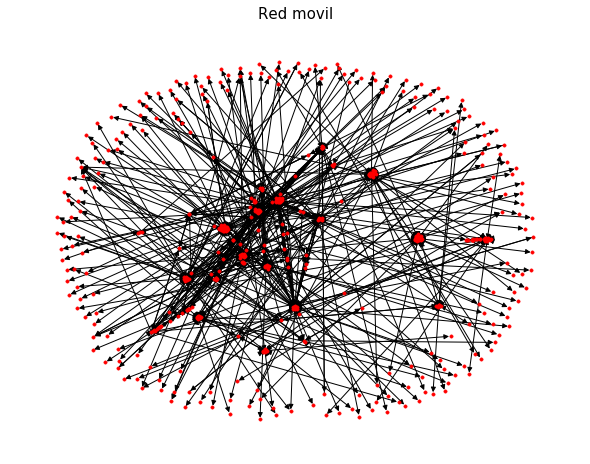

In [13]:
plt.figure(figsize=(8, 6))
nx.spring_layout(G_asymmetric)
nx.draw(G_asymmetric, node_size=11, node_color='red')
plt.title('Red movil', size=15)
plt.show()

In [14]:
G_asymmetric.number_of_edges()

844

In [15]:
df_modelo.shape

(110595, 99)

In [0]:
columnasModelo3 = ['Tipo_Linea', 'Departamento_Alta', 'Subsegmento_Valor',
       'CICLO_C05', 'CICLO_C15', 'CICLO_C23', 'MARCA_APPLE', 'MARCA_HUAWEI',
       'MARCA_LENOVO', 'MARCA_LG', 'MARCA_MOTOROLA', 'MARCA_OTROS',
       'MARCA_SAMSUNG', 'PLAN_GRUPO_ELIGE', 'PLAN_GRUPO_OTRO',
       'PLAN_GRUPO_PORTABILIDAD', 'PLAN_GRUPO_RPM', 'PLAN_GRUPO_STAFF',
       'PLAN_GRUPO_VUELA', 'ENTMIN_MM_MOVISTAR', 'ENTCANT_LLAM_MM_MOVISTAR',
       'ENTCANT_LLAM_DIST_MM_MOVISTAR', 'ENTMIN_MM_CLARO',
       'ENTCANT_LLAM_MM_CLARO', 'ENTCANT_LLAM_DIST_MM_CLARO',
       'ENTMIN_MM_ENTEL', 'ENTCANT_LLAM_MM_ENTEL',
       'ENTCANT_LLAM_DIST_MM_ENTEL', 'ENTMIN_MM_BITEL',
       'ENTCANT_LLAM_MM_BITEL', 'ENTCANT_LLAM_DIST_MM_BITEL',
       'ENTMIN_MM_VIRGIN', 'ENTCANT_LLAM_MM_VIRGIN',
       'ENTCANT_LLAM_DIST_MM_VIRGIN', 'ENTMIN_MF_MOVISTAR',
       'ENTCANT_LLAM_MF_MOVISTAR', 'ENTCANT_LLAM_DIST_MF_MOVISTAR',
       'ENTMIN_MF_OTROS', 'ENTCANT_LLAM_MF_OTROS',
       'ENTCANT_LLAM_DIST_MF_OTROS', 'ENTMIN_LDI', 'ENTCANT_LLAM_LDI',
       'ENTCANT_LLAM_DIST_LDI', 'ENTMIN_OTROS', 'ENTCANT_LLAM_OTROS',
       'ENTCANT_LLAM_DIST_OTROS', 'SALMIN_MM_MOVISTAR',
       'SALCANT_LLAM_MM_MOVISTAR', 'SALCANT_LLAM_DIST_MM_MOVISTAR',
       'SALMIN_MM_CLARO', 'SALCANT_LLAM_MM_CLARO',
       'SALCANT_LLAM_DIST_MM_CLARO', 'SALMIN_MM_ENTEL',
       'SALCANT_LLAM_MM_ENTEL', 'SALCANT_LLAM_DIST_MM_ENTEL',
       'SALMIN_MM_BITEL', 'SALCANT_LLAM_MM_BITEL',
       'SALCANT_LLAM_DIST_MM_BITEL', 'SALMIN_MM_VIRGIN',
       'SALCANT_LLAM_MM_VIRGIN', 'SALCANT_LLAM_DIST_MM_VIRGIN',
       'SALMIN_MF_MOVISTAR', 'SALCANT_LLAM_MF_MOVISTAR',
       'SALCANT_LLAM_DIST_MF_MOVISTAR', 'SALMIN_MF_OTROS',
       'SALCANT_LLAM_MF_OTROS', 'SALCANT_LLAM_DIST_MF_OTROS', 'SALMIN_LDI',
       'SALCANT_LLAM_LDI', 'SALCANT_LLAM_DIST_LDI', 'SALMIN_OTROS',
       'SALCANT_LLAM_OTROS', 'SALCANT_LLAM_DIST_OTROS', 'GB_FACEBOOK',
       'GB_WHATSAPP', 'GB_TWITTER', 'GB_APPFUTBOL_STREAM', 'GB_APPMUSICA',
       'GB_YOUTUBE', 'MB_SKYPE', 'MB_GOOGLEPLAY', 'GB_NETFLIX', 'GB_SNAPCHAT',
       'GB_SPOTIFY', 'GB_INSTAGRAM', 'GB_WHATSAPPCALL', 'GB_UBER', 'GB_HTTP',
       'GB_FREEZONE', 'GB_TIENDAAPPS', 'GB_GOOGLEMAPS', 'GB_EMAIL',
       'GB_LINKEDIN', 'GB_MOVISTARPLAY', 'VALOR_PLAN',
       'Permanencia_Dias_Inicial', 'Permanencia_Dias_Transcurridos',
       'Permanencia_Dias_Faltantes']

### MODELO CON SNA

In [0]:
df_modelo.dropna(inplace=True)

In [0]:
datos_X = df_modelo[columnasModelo3]
datos_y = df_modelo["ID_BAJA"]

In [19]:
datos_X.shape

(110594, 98)

In [20]:
seed = 77
from xgboost import XGBClassifier
xgbcx = XGBClassifier(random_state = seed)
xgbcx.fit(datos_X, datos_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=77,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
IxV = pd.DataFrame({'variable':columnasModelo3,'importancia':xgbcx.feature_importances_})
IxV = IxV.sort_values(by=['importancia'],ascending=False)
IxV.head(10)

,variable,importancia
95,Permanencia_Dias_Inicial,0.050242
9,MARCA_LG,0.050018
97,Permanencia_Dias_Faltantes,0.044687
13,PLAN_GRUPO_ELIGE,0.043529
53,SALCANT_LLAM_MM_ENTEL,0.042861
96,Permanencia_Dias_Transcurridos,0.042132
76,GB_APPFUTBOL_STREAM,0.038279
2,Subsegmento_Valor,0.038130
34,ENTMIN_MF_MOVISTAR,0.032281
94,VALOR_PLAN,0.030674


In [0]:
variables = IxV[:12]
X2 = datos_X[variables.variable]

In [23]:
X2.shape

(110594, 12)

In [24]:
G_asymmetric.number_of_nodes()

516

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [0]:
X_1, X_2, y_1, y_2 = train_test_split(X2, datos_y, test_size=0.00466, random_state=1)

In [27]:
X_2.shape

(516, 12)

In [28]:
y_2.value_counts()

0.0    515
1.0      1
Name: ID_BAJA, dtype: int64

In [29]:
X_2['NUMERO'] = list(G_asymmetric.nodes)
X_2.reset_index(drop=True, inplace=True)
X_2.head()

,Permanencia_Dias_Inicial,MARCA_LG,Permanencia_Dias_Faltantes,PLAN_GRUPO_ELIGE,SALCANT_LLAM_MM_ENTEL,Permanencia_Dias_Transcurridos,GB_APPFUTBOL_STREAM,Subsegmento_Valor,ENTMIN_MF_MOVISTAR,VALOR_PLAN,SALCANT_LLAM_DIST_MM_MOVISTAR,SALCANT_LLAM_MM_CLARO,NUMERO
0,0.055699,0,0.071895,1,0.015665,0.052866,0.0,3,0.004916,0.228144,0.006151,0.002539,7434677419
1,0.055576,0,0.373483,1,0.001270,0.012752,0.0,1,0.000411,0.094624,0.003561,0.007299,7610039694
2,0.055576,0,0.373483,1,0.000847,0.012752,0.0,1,0.000000,0.094624,0.000324,0.001269,7371326239
3,0.054713,0,0.380952,1,0.004657,0.010895,0.0,4,0.000000,0.084534,0.000971,0.000317,7641036117
4,0.057425,0,0.040149,1,0.048688,0.058809,0.0,2,0.000000,0.127282,0.007446,0.020946,7681546436


In [37]:
from random import randint
lista = []
churn = []
for num in X_2['NUMERO']:
  lista.append(nx.eigenvector_centrality(G_asymmetric)[num])
  churn.append(randint(1,10))

X_2['CHURN'] = churn
X_2['INFLUENCIA'] = lista
X_2.head()

,Permanencia_Dias_Inicial,MARCA_LG,Permanencia_Dias_Faltantes,PLAN_GRUPO_ELIGE,SALCANT_LLAM_MM_ENTEL,Permanencia_Dias_Transcurridos,GB_APPFUTBOL_STREAM,Subsegmento_Valor,ENTMIN_MF_MOVISTAR,VALOR_PLAN,SALCANT_LLAM_DIST_MM_MOVISTAR,SALCANT_LLAM_MM_CLARO,NUMERO,CHURN,INFLUENCIA,LLAMADA_CHURN
0,0.055699,0,0.071895,1,0.015665,0.052866,0.0,3,0.004916,0.228144,0.006151,0.002539,7434677419,8,4.666389e-31,0
1,0.055576,0,0.373483,1,0.001270,0.012752,0.0,1,0.000411,0.094624,0.003561,0.007299,7610039694,3,1.007603e-04,0
2,0.055576,0,0.373483,1,0.000847,0.012752,0.0,1,0.000000,0.094624,0.000324,0.001269,7371326239,3,2.307087e-04,5
3,0.054713,0,0.380952,1,0.004657,0.010895,0.0,4,0.000000,0.084534,0.000971,0.000317,7641036117,4,1.969033e-04,0
4,0.057425,0,0.040149,1,0.048688,0.058809,0.0,2,0.000000,0.127282,0.007446,0.020946,7681546436,9,2.307087e-04,16


In [38]:
X_2['CHURN']=X_2['CHURN'].replace([1,2],1)
X_2['CHURN']=X_2['CHURN'].replace([3,4,5,6,7,8,9,10],0)
X_2.head()

,Permanencia_Dias_Inicial,MARCA_LG,Permanencia_Dias_Faltantes,PLAN_GRUPO_ELIGE,SALCANT_LLAM_MM_ENTEL,Permanencia_Dias_Transcurridos,GB_APPFUTBOL_STREAM,Subsegmento_Valor,ENTMIN_MF_MOVISTAR,VALOR_PLAN,SALCANT_LLAM_DIST_MM_MOVISTAR,SALCANT_LLAM_MM_CLARO,NUMERO,CHURN,INFLUENCIA,LLAMADA_CHURN
0,0.055699,0,0.071895,1,0.015665,0.052866,0.0,3,0.004916,0.228144,0.006151,0.002539,7434677419,0,4.666389e-31,0
1,0.055576,0,0.373483,1,0.001270,0.012752,0.0,1,0.000411,0.094624,0.003561,0.007299,7610039694,0,1.007603e-04,0
2,0.055576,0,0.373483,1,0.000847,0.012752,0.0,1,0.000000,0.094624,0.000324,0.001269,7371326239,0,2.307087e-04,5
3,0.054713,0,0.380952,1,0.004657,0.010895,0.0,4,0.000000,0.084534,0.000971,0.000317,7641036117,0,1.969033e-04,0
4,0.057425,0,0.040149,1,0.048688,0.058809,0.0,2,0.000000,0.127282,0.007446,0.020946,7681546436,0,2.307087e-04,16


In [32]:
churners=[]
for i in X_2['NUMERO']:
  cont = 0
  for n1,n2 in list(G_asymmetric.edges):
    
    if i == str(n1):
      
      ch = X_2.loc[X_2['NUMERO'] == n2,'CHURN']
      if int(ch) == 1:
        cont = cont + 1
       
    if i == str(n2):
      ch = X_2.loc[X_2['NUMERO'] == n1,'CHURN']
      if int(ch) == 1:
        cont = cont + 1
        
  churners.append(cont)

X_2['LLAMADA_CHURN'] = churners
X_2.head()

,Permanencia_Dias_Inicial,MARCA_LG,Permanencia_Dias_Faltantes,PLAN_GRUPO_ELIGE,SALCANT_LLAM_MM_ENTEL,Permanencia_Dias_Transcurridos,GB_APPFUTBOL_STREAM,Subsegmento_Valor,ENTMIN_MF_MOVISTAR,VALOR_PLAN,SALCANT_LLAM_DIST_MM_MOVISTAR,SALCANT_LLAM_MM_CLARO,NUMERO,CHURN,INFLUENCIA,LLAMADA_CHURN
0,0.055699,0,0.071895,1,0.015665,0.052866,0.0,3,0.004916,0.228144,0.006151,0.002539,7434677419,0,4.666389e-31,0
1,0.055576,0,0.373483,1,0.001270,0.012752,0.0,1,0.000411,0.094624,0.003561,0.007299,7610039694,0,1.007603e-04,0
2,0.055576,0,0.373483,1,0.000847,0.012752,0.0,1,0.000000,0.094624,0.000324,0.001269,7371326239,0,2.307087e-04,5
3,0.054713,0,0.380952,1,0.004657,0.010895,0.0,4,0.000000,0.084534,0.000971,0.000317,7641036117,1,1.969033e-04,0
4,0.057425,0,0.040149,1,0.048688,0.058809,0.0,2,0.000000,0.127282,0.007446,0.020946,7681546436,0,2.307087e-04,16


In [35]:
X_2.sort_values(by="INFLUENCIA", ascending=False)[['NUMERO','INFLUENCIA','LLAMADA_CHURN']].head(10)

,NUMERO,INFLUENCIA,LLAMADA_CHURN
129,7456622368,0.434180,0
94,7102745960,0.364634,0
68,7304637408,0.173996,0
81,7341891255,0.153235,1
75,7775682498,0.153235,2
85,7476886744,0.153235,1
89,7456622368,0.153235,19
72,7118310788,0.153235,2
74,7720520621,0.153235,2
105,7073084322,0.135686,2


In [0]:
X_2.to_csv("sna_churn.csv", index=False)
files.download("sna_churn.csv")

In [0]:
target = X_2['CHURN']
pred = X_2.drop('CHURN', axis=1)
pred.drop('NUMERO',axis=1, inplace=True)

In [0]:
resultados = {}
from sklearn.model_selection import cross_validate

def evaluar_modelo(estimador, X, y):
    resultados_estimador = cross_validate(estimador, X, y,
                     scoring="roc_auc", n_jobs=1, cv=5, return_train_score=True)
    return resultados_estimador

def ver_resultados():
    resultados_df  = pd.DataFrame(resultados).T
    resultados_cols = resultados_df.columns
    for col in resultados_df:
        resultados_df[col] = resultados_df[col].apply(np.mean)
        resultados_df[col+"_idx"] = resultados_df[col] / resultados_df[col].max()
    return resultados_df

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
resultados["naive_bayes"] = evaluar_modelo(GaussianNB(), pred, target)
resultados["rf"] = evaluar_modelo(RandomForestClassifier(), pred, target)

In [0]:
ver_resultados()

,fit_time,score_time,test_score,train_score,fit_time_idx,score_time_idx,test_score_idx,train_score_idx
naive_bayes,0.002993,0.002420,0.530473,0.616282,0.210232,0.778536,1.000000,0.616736
rf,0.014238,0.003108,0.451611,0.999264,1.000000,1.000000,0.851336,1.000000


In [0]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
estimador_rf = RandomForestClassifier()
parametros_busqueda_rf = {
    "criterion": ["gini", "entropy"],
    "n_estimators": np.linspace(1,40,40).astype(int),
    "class_weight": [None, "balanced"]
}
grid = GridSearchCV(estimator=estimador_rf, 
                    param_grid=parametros_busqueda_rf,
                    scoring="roc_auc", n_jobs=-1)

In [0]:
grid.fit(pred, target)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_sco...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [0]:
print(grid.best_score_)
print(grid.best_estimator_)

0.5676832009241058
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=6, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


In [0]:
modelo_sna = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=6, n_jobs=1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [0]:
modelo_sna.fit(pred, target)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=6, n_jobs=1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, modelo_sna.predict(pred))

array([[426,   1],
       [ 25,  64]])

In [0]:
!pip install joblib
import joblib

In [0]:
joblib.dump(modelo_sna,"modelo_sna.pkl")
files.download("modelo_sna.pkl")